In [11]:
# data analysis libraries:
import numpy as np
import pandas as pd

# data visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings:
import warnings
warnings.filterwarnings('ignore')

# to display all columns:
pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split, GridSearchCV




In [3]:
# Read train and test data with pd.read_csv():
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [4]:
# copy data in order to avoid any change in the original:
train = train_data.copy()
test = test_data.copy()

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


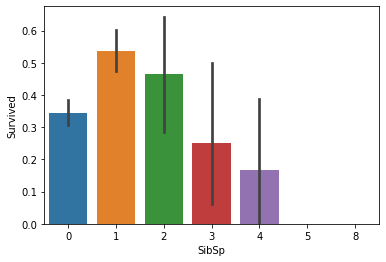

In [9]:
sns.barplot(x = 'SibSp', y = 'Survived', data = train)

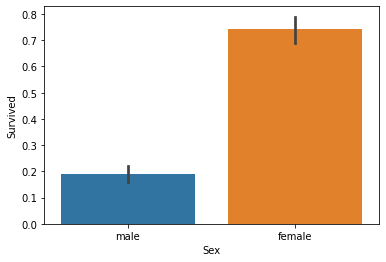

In [10]:
sns.barplot(x = 'Sex', y = 'Survived', data = train);